<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [ ]:
##### Your Code Here #####
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [48]:
X_train.shape

(404, 13)

In [49]:
y_train.shape

(404,)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(1, activation='linear'))

In [124]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

In [128]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[stop])

Epoch 1/1000
13/13 [==============================] - 0s 4ms/step - loss: 50.9286 - val_loss: 77.9889
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 48.2102 - val_loss: 72.3350
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 49.1157 - val_loss: 71.9377
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 48.0077 - val_loss: 70.0210
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 47.0645 - val_loss: 70.2594
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 44.3818 - val_loss: 69.5050
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 45.1011 - val_loss: 69.1705
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 45.4941 - val_loss: 69.3652
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 45.3454 - val_loss: 68.2810
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 44.0489

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [129]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [130]:
X_train.shape

(60000, 28, 28)

In [134]:
y_train.shape

(60000,)

In [148]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [151]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1280, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test), callbacks=[stop])

Epoch 1/100
1875/1875 [==============================] - 14s 8ms/step - loss: 4.6219 - accuracy: 0.7810 - val_loss: 0.6177 - val_accuracy: 0.7925
Epoch 2/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5310 - accuracy: 0.8259 - val_loss: 1.2024 - val_accuracy: 0.7893
Epoch 3/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5252 - accuracy: 0.8301 - val_loss: 0.6053 - val_accuracy: 0.8180
Epoch 4/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4982 - accuracy: 0.8363 - val_loss: 0.5702 - val_accuracy: 0.8237
Epoch 5/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4866 - accuracy: 0.8395 - val_loss: 0.5765 - val_accuracy: 0.8192
Epoch 6/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4657 - accuracy: 0.8453 - val_loss: 0.5360 - val_accuracy: 0.8214


In [140]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [152]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

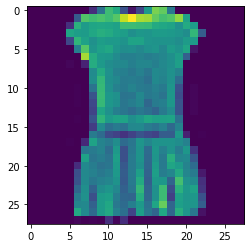

In [153]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [194]:
np.round(model.predict(X_train[3].reshape(1,28,28)))

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.

In [ ]:
url = 'https://lh3.googleusercontent.com/proxy/a5kfzEpv1e8lsHKsEbqpCDSysdmAHMNUBZ7uFgoLXhhE1kgYk8URVMStjyX1HOsd4RlKocVX79IYYMahfEg1QOcxkO-CRec1eC9RrU4'

In [ ]:
from PIL import Image
from PIL.ImageOps import solarize
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
#opens the image and converts image to grayscale

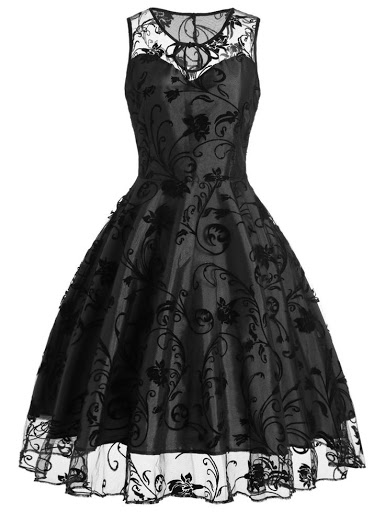

In [180]:
img

In [ ]:
resized = img.resize((28,28))
#converts it to square 28 by 28

In [182]:
resized

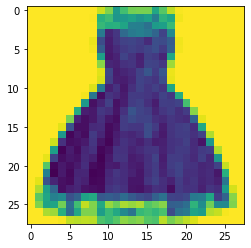

In [183]:
plt.imshow(resized)

In [ ]:
test_array = np.array(resized.getdata())

In [ ]:
pred = model.predict(test_array.reshape(1,28,28))

In [192]:
np.round(pred)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [199]:
prediction = np.round(pred)
np.nonzero(prediction)[1][0]

numpy.int64

In [ ]:
sandal = 'https://assets.hermes.com/is/image/hermesproduct/oran-sandal--021056Z%2001-front-1-300-0-600-600_b.jpg'

In [1]:
def predict_on_photo(url, model):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('L')
    #opens the image and converts image to grayscale
    inverted = solarize(img)
    #inverts pixels above 128 threshold
    resized = img.resize((28,28))
#converts it to square 28 by 28
    test_array = np.array(resized.getdata())
  #reshapes into a 1x28x28 array for the model
    pred = np.round(model.predict(test_array.reshape(1,28,28)))
    final = int(np.nonzero(pred)[1][0])
    labels = {0 : 'T-shirt/top', 1 : 'Trousers', 2 : 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
    print("Model predicts that this image is a", labels[final])
    return img

Model predicts that this image is a Bag


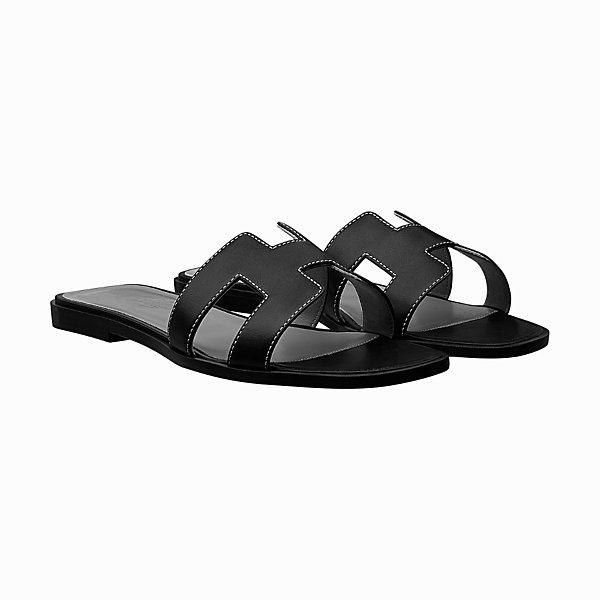

In [229]:
predict_on_photo(sandal, model)

In [ ]:
dress = "https://www.how-to-draw-funny-cartoons.com/images/cartoon-dress-003.jpg"

In [212]:
predict_on_photo(dress, model)

Model predicts that this image is a Bag


In [ ]:
shoe = "https://www.brooksrunning.com/dw/image/v2/aaev_prd/on/demandware.static/-/Sites-BrooksCatalog/default/dwbb729ac9/images/ProductImages/120283/120283_097_l_WR.jpg?sw=900"

In [214]:
predict_on_photo(shoe, model)

Model predicts that this image is a Bag


Is it just going to predict that for everything? 

In [215]:

pred = np.round(model.predict(X_train[3].reshape(1,28,28)))
final = int(np.nonzero(pred)[1][0])
labels = {0 : 'T-shirt/top', 1 : 'Trousers', 2 : 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
print("Model predicts that this image is a", labels[final])

Model predicts that this image is a Dress


In [222]:
shoe = "https://hips.hearstapps.com/vader-prod.s3.amazonaws.com/1562710823-brogue-1562710816.jpg"

predict_on_photo(shoe, model)

Model predicts that this image is a Bag


array([255, 255, 255, 255, 206, 152, 233, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 115,  32,  91, 223, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 250,  85,  38,  43,  87, 213,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 232,  66,  48,  51,
        55,  77, 179, 252, 247, 225, 253, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 204,  58,
        53,  49,  60,  61,  61, 120, 170, 183, 170, 249, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       171,  65,  58,  45,  54,  63,  63,  77, 142, 172, 101, 192, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 131,  71,  68,  54,  40,  52,  77, 117, 134, 16

In [ ]:
shirt = "https://store.sabaton.net/wp-content/uploads/2015/11/wings-of-glory-tshirt-back-sabaton-T15003.png"

In [230]:
predict_on_photo(shirt, model)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


IndexError: ignored